## CSCE 676 :: Data Mining and Analysis :: Texas A&M University :: Spring 2022


# Homework 3

- **100 points [7% of your final grade]**
- **Due April 10, 2022 by 11:59pm**

*Goals of this homework:* In this homework, you will investigate data visualization and the foundations of recommendation.



*Submission instructions:* This homework is a bit different from the previous ones. For the visualizatin component, you will post to Campuswire. See below for details. For the recommendation component, rename this notebook as `UIN_hw3.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be `123456789_hw2.ipynb`. Submit this notebook via Canvas. Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late policy:* No late days for the data visualization. For the recommendaiton, you may use up to three of your late days. No homeworks will be accepted after April 13 11:59pm.

## Collaboration Declaration:

***You must add all of your collaboration declarations here. Who did you talk to about this assignment? What web resources did you use? Etc.***

For example:
* Part 3a: I talked to Amy about how to split the data randomly. She helped me understand that I needed to use a random number generator.
* Part 3b: I needed help on how to comment my code, so I relied on this StackOverflow thread: https://stackoverflow.com/questions/184618/what-is-the-best-comment-in-source-code-you-have-ever-encountered
* (Replace this bullet list with your own collaboration declarations.)


## (30 points) Part 1: Data Visualization (submit to Campuswire, no late days)

For this first part, you will create a data visualization based on an exploration of a dataset we provide. Your visualization should capture Tufte's principles of graphical excellence: "complex ideas communicated with clarity, precision, and efficiency."

### The Data
You must choose one of the following datasets:

* Police Shootings: The Washington Post's database contains records of every fatal shooting in the United States by a police officer in the line of duty since Jan. 1, 2015
    * [data](https://github.com/washingtonpost/data-police-shootings)
    * [website](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/) (including some example charts)

* Bike Sharing: This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.
    * [data](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)

* Tennis Time: A dataset of tennis players and how much time they take.
    * [data](https://github.com/fivethirtyeight/data/tree/master/tennis-time)
    * [article](https://fivethirtyeight.com/features/why-some-tennis-matches-take-forever/)

### Your Goal
1. Identify an interesting story or insight from this data
2. Carefully design a data visualization that communicates this story.

You may assume that your audience is the **general public.**

You may clean, manipulate, and transform the data as you like. You are free to use external data from whatever sources you like. (But be sure to cite them!). Feel free to use as little or as much data as you like, so long as the story (and associated data visualization are compelling). 


### What to Submit

Utimately you should produce:


1. A single image (e.g., PNG, PDF, JPG) that effectively communicates the data. You must use a Python visualization toolkit as your key tool, but you are welcome to augment with other tools if you like (e.g., Photoshop, MS Paint, GIMP). For Python viz tools, you may use matplotlib, plotly, seaborn, geoplotlib, bokeh, networkx, or whatever else you can find.
    
2. A brief explanation describing your design. (a few paragraphs, 1/2 page or so).

Your explanation should justify the design choices you have made. 

* Why did you choose the particular visualization type? 
* What motivated your choice of size, color,
and scale? 
* Why are they appropriate for what you are trying to communicate?
* Additionally, your explanation should document:
    * What you are trying to
communicate
    * The benefits of your choice of visualization
    * As well as any downsides
to your viz (e.g., are certain connections downplayed due to your choices?).

### How to Submit
You should post your image + explanation to Campuswire by April 10 (no late days).

In [1]:
# Download useful modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import pandas as pd
url = 'https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv'
df = pd.read_csv(url)
df.head()
for x in range(df.race.shape[0]):
  if df['race'][x] == "A":
    df['race'][x] = "Asian"
  if df['race'][x] == "B":
    df['race'][x] = "Black"
  if df['race'][x] == "W":
    df['race'][x] = "White"
  if df['race'][x] == "H":
    df['race'][x] = "Hispanic"
  if df['race'][x] == "N":
    df['race'][x] = "Native"
  if df['race'][x] == "O":
    df['race'][x] = "Other"

df.head(100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,133,Vincent Cordaro,2015-02-08,shot,gun,57.0,M,White,New City,NY,True,attack,Not fleeing,False,-74.001,41.152,True
96,134,Joseph Paffen,2015-02-08,shot,gun,46.0,M,White,Orange County,FL,False,attack,Not fleeing,False,-81.329,28.482,True
97,135,Larry Hostetter,2015-02-08,shot,gun,41.0,M,White,Nocona,TX,False,attack,Not fleeing,False,-97.712,33.787,True
98,136,Kenneth Kreyssig,2015-02-09,shot,gun,61.0,M,White,Smyrna,ME,True,attack,Not fleeing,False,-68.104,46.159,True


In [3]:
sizes = df.race.value_counts()
print(sizes)

White       3022
Black       1593
Hispanic    1088
Asian        105
Native        91
Other         47
Name: race, dtype: int64


In [4]:
df['Year'] = df['date'].str.split('-', n = 1,expand = True).drop(1, axis = 1)
year_race_count = df[['Year', 'race']]
year_race_count_1 = pd.DataFrame(year_race_count.groupby('Year')['race'].value_counts())
year_race_count_1.rename(columns = {'race' : 'Count'}, inplace = True)

year_race_count_2 = year_race_count_1.reset_index()
year_race_count_2.rename(columns = {'race' : 'Race'}, inplace = True)
year_race_count_2.sort_values('Year', ascending = True, inplace = True)
fig_year = px.bar(year_race_count_2, x="Count", y="Year", color='Race', orientation='h',
             hover_data=["Race", "Count"],
             height=600, width = 700,
             title="Victim's Race distribution in the year ")

fig_year.update_layout(title = {'text': "Year wise distribution of victim's race",'y':0.95,
            'x':0.5, 'xanchor':'center', 'yanchor':'top'},  xaxis_title="Count",
        yaxis_title="Year",  paper_bgcolor='rgba(256,256,256,256)',
    plot_bgcolor='rgba(0,0,0,0)',
            font=dict(
            family="Courier New, monospace",
            size=16,
            color="Black"
        )
           
                     )
fig_year.show()


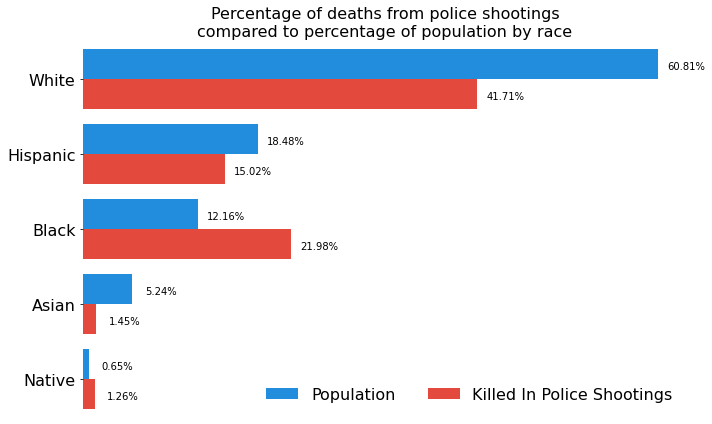

In [5]:
# Get data
us_census_data = pd.read_csv('https://raw.githubusercontent.com/tejten/Machine-Learning-1/master/Data/acs2017_county_data.csv')
url = 'https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/fatal-police-shootings-data.csv'
df = pd.read_csv(url)
# Get population proportions
total_population = us_census_data['TotalPop'].sum()
race_proportions = pd.DataFrame(['White', 'Hispanic', 'Black', 'Asian', 'Native'], columns=['Race'])
race_proportions['Population'] = race_proportions['Race'].apply(lambda x: us_census_data.apply(lambda y: y['TotalPop'] * y[x] / total_population, axis=1).sum())
race_proportions['Killed In Police Shootings'] = race_proportions['Race'].apply(lambda x: df[df['race'] == x[0]].shape[0] * 100 / df.shape[0])

# Plot proportions
race_proportions = race_proportions.melt(id_vars='Race')
fig, ax = plt.subplots(1, 1, figsize=(10,6))
sns.barplot(x='value', y='Race', hue='variable',data=race_proportions, ax=ax,
            orient='h', palette=['#0390fc', '#ff3321'])

# Annotate with values
for p in ax.patches:
    width = p.get_width()
    plt.text(3+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.2f}%'.format(width),
             ha='center', va='center')

# Customise and show
ax.set_title('Percentage of deaths from police shootings\ncompared to percentage of population by race', fontsize=16)
ax.tick_params(axis='both', labelsize=16)
for spine in ax.spines.values():
    spine.set_visible(False)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
plt.legend(frameon=False, fontsize=16, ncol=2)
plt.tight_layout()
plt.show()

### Grading Breakdown

- 10%: Interestingness and clarity of question you ask
- 20%: Appropriateness of data, scale, and other viz design choices
- 10%: Legends, context, and titles of your viz
- 20%: Overall quality of your viz: in the extreme, every pixel serves a purpose
- 20%: Design rationale (writeup)
- 20%: Pros and cons of your design (writeup)


## (5 points) Part 2: Data Viz Critique (on Campuswire by April 17)

After all the data visualizations have been posted to Campuswire, you will be responsible for providing a critique of **at least two** data visualizations provided by your classmates. 

You should reply in the thread and provide a brief *constructive* critique. Do your best to load balance, so that every data visualization receives some feedback.

On the final homework, each student will have an opportunity to revise the original data visualization based on this feedback.



## (65 points) Part 3: Recommendation with User Ratings (Explicit Feedback) 

In this part, we focus on the rating prediction recommendation task with explicit feedback. We will:

* load and process the MovieLens 1M dataset, 
* build a baseline estimation model,
* build a collaborative filtering model,
* build a matrix factorization model,
* and try to improve upon these models.

First, we need to load and preprocess the experiment dataset. We use the MovieLens 1M data from https://grouplens.org/datasets/movielens/1m/ in this homework. The code has been provided in the next cell, and you need to run it. The resulting data variables are: train_mat is the numpy array variable for training data of size (#users, #items) with non-zero entries representing user-item ratings, and zero entries representing unknown user-item ratings; and test_mat is the numpy array variable for testing data of size (#users, #items).

In [7]:
# if you're using colab, this is a clunky way to load the ratings.dat file we need
# navigate in your finder to ratings.dat when asked
from google.colab import files
uploaded = files.upload()

Saving ratings.dat to ratings.dat


In [57]:
import io
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

data_df = pd.read_csv(io.BytesIO(uploaded['ratings.dat']), sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

# if you are running this notebook locally, you can replace above with something like this:
# data_df = pd.read_csv('./ratings.dat', sep='::', names=["UserID", "MovieID", "Rating", "Timestamp"])

# First, generate dictionaries for mapping old id to new id for users and movies
unique_MovieID = data_df['MovieID'].unique()
unique_UserID = data_df['UserID'].unique()
j = 0
user_old2new_id_dict = dict()
for u in unique_UserID:
    user_old2new_id_dict[u] = j
    j += 1
j = 0
movie_old2new_id_dict = dict()
for i in unique_MovieID:
    movie_old2new_id_dict[i] = j
    j += 1
    
# Then, use the generated dictionaries to reindex UserID and MovieID in the data_df
user_list = data_df['UserID'].values
movie_list = data_df['MovieID'].values
for j in range(len(data_df)):
    user_list[j] = user_old2new_id_dict[user_list[j]]
    movie_list[j] = movie_old2new_id_dict[movie_list[j]]
data_df['UserID'] = user_list
data_df['MovieID'] = movie_list

# generate train_df with 70% samples and test_df with 30% samples, and there should have no overlap between them.
train_index = np.random.random(len(data_df)) <= 0.7
train_df = data_df[train_index]
test_df = data_df[~train_index]

# generate train_mat and test_mat
num_user = len(data_df['UserID'].unique())
num_movie = len(data_df['MovieID'].unique())

train_mat = coo_matrix((train_df['Rating'].values, (train_df['UserID'].values, train_df['MovieID'].values)), shape=(num_user, num_movie)).astype(float).toarray()
test_mat = coo_matrix((test_df['Rating'].values, (test_df['UserID'].values, test_df['MovieID'].values)), shape=(num_user, num_movie)).astype(float).toarray()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



## Part 3a: Build the Baseline Estimation Model (15 points)

First, let's implement a simple personalized recommendation model -- the baseline estimate -- introduced in class: $b_{u,i}=\mu+b_i+b_u$, where $\mu$ is the overall mean rating for all items, $b_u$ = average rating of user $u-\mu$, $b_i$ = average rating of item $i-\mu$. Store your prediction as a numpy array variable 'prediction_mat' of size (#users, #movies) with each entry showing the predicted rating for the corresponding user-movie pair.

* Hint: for users who do not have ratings in train_mat, set $b_u=0$ for them; and for movies which do not have ratings in train_mat, set $b_i=0$ for them

In [58]:
data_df.head()
train_df.head()
data_df.head()
print(unique_MovieID)
print(unique_UserID)
print(user_old2new_id_dict)
print(movie_old2new_id_dict)
print(user_list)
print(movie_list)
print(train_mat)
print(train_mat.shape)
print(train_df['Rating'].shape[0])

[1193  661  914 ... 2845 3607 2909]
[   1    2    3 ... 6038 6039 6040]
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40, 42: 41, 43: 42, 44: 43, 45: 44, 46: 45, 47: 46, 48: 47, 49: 48, 50: 49, 51: 50, 52: 51, 53: 52, 54: 53, 55: 54, 56: 55, 57: 56, 58: 57, 59: 58, 60: 59, 61: 60, 62: 61, 63: 62, 64: 63, 65: 64, 66: 65, 67: 66, 68: 67, 69: 68, 70: 69, 71: 70, 72: 71, 73: 72, 74: 73, 75: 74, 76: 75, 77: 76, 78: 77, 79: 78, 80: 79, 81: 80, 82: 81, 83: 82, 84: 83, 85: 84, 86: 85, 87: 86, 88: 87, 89: 88, 90: 89, 91: 90, 92: 91, 93: 92, 94: 93, 95: 94, 96: 95, 97: 96, 98: 97, 99: 98, 100: 99, 101: 100, 102: 101, 103: 102, 104: 103, 105: 104, 106: 105, 107: 106, 108: 107, 109: 108, 110: 109, 111: 110, 112: 111, 113: 112, 114: 113, 115: 

In [82]:
# calculate the prediction_mat by the baseline estimation recommendation algorithm
# Your Code Here...

mean_rating = (np.average(train_df['Rating']))
b_user = np.zeros(num_user)
b_movie = np.zeros(num_movie)
prediction_mat = np.zeros([num_user,num_movie])


for i in range(num_user):
  count1 = num_movie
  if np.sum(train_mat[i,:]) == 0:
    b_user[i] = 0
    continue
  for k in range(num_movie):
    if train_mat[i][k] == 0:
      count1 = count1 - 1
  b_user[i] = ((np.sum(train_mat[i,:]))/(count1))- mean_rating

for j in range(num_movie):
  count2 = num_user
  if np.sum(train_mat[:,j]) == 0:
    b_movie[j] = 0
    continue
  for l in range(num_user):
    if train_mat[l][j] == 0:
      count2 = count2 - 1
  b_movie[j] = ((np.sum(train_mat[:,j]))/(count2)) - mean_rating




for i in range(num_user):
  for j in range(num_movie):
    if test_mat[i][j] > 0:
      prediction_mat[i][j] = mean_rating + b_user[i] + b_movie[j]


Now, with this prediction_mat based on the baseline estimate, let's calculate the RMSE to evaluate the quality of the baseline estimate model. Please print out the RMSE of your prediction_mat using test_mat in the next cell.


In [83]:
# calculate and print out the RMSE for your prediction_df and the test_df
# Your Code Here...
import math

SE = 0
count4 = 0
for i in range(num_user):
  for j in range(num_movie):
    if test_mat[i][j] != 0:
      SE = SE + pow((prediction_mat[i][j] - test_mat[i][j]),2)
      count4 = count4 +1 


RMSE = math.sqrt(SE/ count4)
print("The RMSE value we obtain using our Baseline estimation Recommendation model is ", RMSE)



The RMSE value we obtain using our Baseline estimation Recommendation model is  0.9368475159224561


The RMSE value we obtain using our Baseline estimation Recommendation model is  0.9380423113333937 

## Part 3b: Collaborative Filtering with Jaccard Similarity (15 points)

In this part, you need to build a collaborative filtering recommendation model with **Jaccard similarity** to predict user-movie ratings. 

The prediction of the score for a user-item pair $(u,i)$ should use the formulation: $p_{u,i}=\bar{r}_u+\frac{\sum_{u^\prime\in N}s(u,u^\prime)(r_{u^\prime,i}-\bar{r}_{u^\prime})}{\sum_{u^\prime\in N}|s(u, u^\prime)|}$ as introduced in class, where $s(u, u^\prime)$ is the Jaccard similarity. We set the size of $N$ as 10.

In the next cell, you need to write your code to implement this algorithm, and generate a numpy array variable named 'prediction_mat' of size (#user, #movie) with each entry showing the predicted rating for the corresponding user-movie pair.

* Hint: when you find the nearest neighbor set $N$ of a user $u$, do not include user $u$ in $N$  


In [42]:
# calculate the prediction_mat by your user-user collaborative filtering recommendation algorithm
# Your Code Here...
#get user-user similiarity matrix
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics.pairwise import pairwise_distances
jac_sim = 1 - pairwise_distances(train_mat, metric = "hamming")





In [43]:
#get the neighborhood
topten = [{}] * num_user
top11 = np.zeros(11)
top10 = np.zeros(10)
top11v = np.zeros(11)
top10v = np.zeros(10)
for i in range(num_user):
  top11 = np.argsort(jac_sim[i,:])[::-1][:11]
  top10 = top11[1:11]
  top11v = np.sort(jac_sim[i,:])[::-1][:11]
  top10v = top11v[1:10]
  topten[i] = dict(zip(top10,top10v))


In [44]:
rbar = np.zeros(num_user)
for i in range(num_user):
  count1 = num_movie
  for k in range(num_movie):
    if train_mat[i][k] == 0:
      count1 = count1 - 1
  if count1 ==  0:
      count1 = 1
  rbar[i] = ((np.sum(train_mat[i,:]))/(count1))


In [45]:
#get prediction matrix
rf = 0
pred_mat = np.zeros([num_user,num_movie])
for i in range(num_user):
  for j in range(num_movie):
    if test_mat[i][j] != 0:
      rfn = 0
      rfd = 0
      for u in (topten[i].keys()):
        if train_mat[u][j] != 0:
          rfn = rfn + ((topten[i][u]) * ((train_mat[u][j])-rbar[u]))
          rfd = rfd + abs(topten[i][u])
      if(rfd == 0):
        rf = 0
      else:
        rf = rfn/rfd


    pred_mat[i][j] = rbar[i] + rf
    
print(pred_mat)

[[4.18421053 4.18421053 4.18421053 ... 4.18421053 4.18421053 4.18421053]
 [3.69791667 3.69791667 3.69791667 ... 3.69791667 3.69791667 3.69791667]
 [3.84848485 3.84848485 3.84848485 ... 3.84848485 3.84848485 3.84848485]
 ...
 [4.         4.         4.         ... 4.         4.         4.        ]
 [3.85882353 3.85882353 3.85882353 ... 3.85882353 3.85882353 3.85882353]
 [3.59591837 3.59591837 3.59591837 ... 3.59591837 3.59591837 3.59591837]]


Please print out the RMSE of your prediction_mat using test_mat in the next cell.

In [46]:
# calculate and print out the RMSE for your prediction_df and the test_df
# Your Code Here...
import math
count5 = 0
SE = 0
for i in range(num_user):
  for j in range(num_movie):
    if test_mat[i][j] != 0:
      SE = SE + pow((pred_mat[i][j] - test_mat[i][j]),2)
      count5 = count5 +1 


RMSE = math.sqrt(SE/ count5)
print("The RMSE value we obtain using our collaborative filtering Recommendation model is ", RMSE)

The RMSE value we obtain using our collaborative filtering Recommendation model is  1.0640971185163772


Comparing the RMSE results of this collaborative filtering and the baseline estimate algorithm, what do you observe? Is the  collaborative filtering the one producing the best performance? What reasons do you think can explain what you observe?

*Write your answer here...*

Comparing the RMSE results of collaborative filtering and the baseline estimate algorithm, I observed that my baseline estimate performed better than the colloborative filtering method.

Usually, the collaborative filtering model should work well incomparsion with the base line model, but it doesn't work that well here for the following reasons:

CF model doesn't do that well when the training matrix is very sparse, because there is a high chance of missing ratings for many neighbors for a user and still there is a possibility of obtaining high value of jaccard similarity between both the users.

## Part 3c: Matrix Factorization (15 points)

Now we turn to matrix factorization. First, let's implement the matrix factorization (MF for short) model introduced in class. The MF model can be mathematically represented as: 

<center>$\underset{\mathbf{P},\mathbf{Q}}{\text{min}}\,\,L=\sum_{(u,i)\in\mathcal{O}}(\mathbf{P}_u\cdot\mathbf{Q}^\top_i-r_{u,i})^2+\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}})$,</center>
    
where $\mathbf{P}$ is the user latent factor matrix of size (#user, #latent); $\mathbf{Q}$ is the movie latent factor matrix of size (#movie, #latent); $\mathcal{O}$ is a user-movie pair set containing all user-movie pairs having ratings in train_mat; $r_{u,i}$ represents the rating for user u and movie i; $\lambda(\lVert\mathbf{P}\rVert^2_{\text{F}}+\lVert\mathbf{Q}\rVert^2_{\text{F}})$ is the regularization term to overcome overfitting problem, $\lambda$ is the regularization weight (a hyper-parameter manually set by developer, i.e., you), and $\lVert\mathbf{P}\rVert^2_{\text{F}}=\sum_{x}\sum_{y}(\mathbf{P}_{x,y})^2$, $\lVert\mathbf{Q}\rVert^2_{\text{F}}=\sum_{x}\sum_{y}(\mathbf{Q}_{x,y})^2$. Such an L function is called the **loss function** for the matrix factorization model. The goal of training an MF model is to find appropriate $\mathbf{P}$ and $\mathbf{Q}$ to minimize the loss L.

To implement such an MF, here we will write a Python class for the model. There are three functions in this MF class: init, train, and predict. 

* The 'init' function (**already provided**) is to initialize the variables the MF class needs, which takes 5 inputs: train_mat, test_mat, latent, lr, and reg. 'train_mat' and 'test_mat' are the corresponfing training and testing matrices we have. 'latent' represents the latent dimension we set for the MF model. 'lr' represents the learning rate, i.e., the update step in each optimization iteration, default is 0.01. 'reg' represents the regularization weight, i.e., the $\lambda$ in the MF formulation.

* The 'train' function (**partially provided and need to complete**) is to train the MF model given the training data train_mat. There is only one input to this function: an int variable 'epoch' to indicate how many epochs for training the model. The main body of this function should be a loop for 'epoch' iterations. In each iteration, following the algorithm to update the MF model:

        1. Randomly shuffle training user-movie pairs  (i.e., user-movie pairs having ratings in train_mat)
        2. Have an inner loop to iterate each user-movie pair:
                a. given a user-movie pair (u,i), update the user latent factor and movie latent factor by gradient decsent:    
<center>$\mathbf{P}_u=\mathbf{P}_u-\gamma [2(\mathbf{P}_u\cdot\mathbf{Q}_i^\top-r_{u,i})\cdot\mathbf{Q}_i+2\lambda\mathbf{P}_u]$</center>    
<center>$\mathbf{Q}_i=\mathbf{Q}_i-\gamma [2(\mathbf{P}_u\cdot\mathbf{Q}_i^\top-r_{u,i})\cdot\mathbf{P}_u+2\lambda\mathbf{Q}_i]$</center>    
<center>where $\mathbf{P}_u$ and $\mathbf{Q}_i$ are row vectors of size (1, #latent), $\gamma$ is learning rate (default is 0.01), $\lambda$ is regularization weight.</center>
        
        3. After iterating over all user-movie pairs, we have finished the training for the current epoch. Now calculate and print out the value of the loss function L after this epoch, and the RMSE on test_mat by the current MF model. Then append them to lists to keep a record of them.
The train function needs to return two lists: 'epoch_loss_list' recording the loss after each training epoch, and 'epoch_test_RMSE_list' recording the RMSE on test_mat after each training epoch.

* The 'predict' function (**already provided**) is to calculate the prediction_mat by the learned $\mathbf{P}$ and $\mathbf{Q}$.

In the next cell, we provide the 'init' and 'predict' functions. You will need to fill in the 'train' function based on the description above. 

**NOTE that you should not delete or modify the provided code.**

In [29]:
import random
class MF:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = train_mat.shape
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie pairs having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
        self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for items, size (#movie, self.latent), randomly initialized


    def train(self, epoch=20, verbose=True):
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        for e in range(epoch):
            user_movie_pairs = list(zip(self.sample_user, self.sample_movie))
            random.shuffle(user_movie_pairs)
            for u in user_movie_pairs:
                movie = int(u[1])
                user = int(u[0])
                self.updateLatentFactor(user, movie)

            loss = 0
            for u in user_movie_pairs:
                movie = int(u[1])
                user = int(u[0])
                temp = np.dot(self.P[user], self.Q[movie].transpose()) - self.train_mat[user][movie]
                loss += np.square(temp)   

            train_loss = loss + (self.reg * (np.sum(np.square(self.Q)) + np.sum(np.square(self.P))))
            prediction_mat = self.predict()
            test_zeros = np.where(self.test_mat == 0)
            prediction_mat[test_zeros] = 0


            rmse_0 = np.subtract(prediction_mat, self.test_mat)
            rmse_1 = np.sum(np.square(rmse_0))

            test_nonzeros = np.count_nonzero(self.test_mat)
            rmse_2 = np.divide(rmse_1, test_nonzeros)

            rmse = np.sqrt(rmse_2)
            print(f"Epoch number : {e + 1}     Loss = {train_loss}    Test RMSE = {rmse}")

            epoch_loss_list.append(train_loss)
            epoch_test_RMSE_list.append(rmse)
 
        return epoch_loss_list, epoch_test_RMSE_list
        
        
        
    def updateLatentFactor(self, user, movie):

      temp = 2 * (np.dot(self.P[user] , self.Q[movie].transpose()) - self.train_mat[user][movie])
      user_latentfactor = self.P[user] - self.lr * (temp * self.Q[movie] + 2 * self.reg*self.P[user])
      movie_latentfactor = self.Q[movie] - self.lr * (temp * self.P[user] + 2 * self.reg*self.Q[movie])
      self.P[user] = user_latentfactor
      self.Q[movie] = movie_latentfactor

        
    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T)
        return prediction_mat

Now, let's train an MF model based on your implementation. The code is provided, you just need to excute the next cell. The expectations are: 

* first, the code can be successfully excuted without error; 
* and second, the training loss and RMSE on **test_mat** of each training epoch should be printed out for all 20 epochs.


* Hint: the expected time used for training is around 10s to 60s per training epoch.

In [30]:
mf = MF(train_mat, test_mat, latent=5, lr=0.01, reg=0.001)
epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20)

Epoch number : 1     Loss = 611133.6792001898    RMSE = 0.9543057731227282
Epoch number : 2     Loss = 601493.5281556781    RMSE = 0.9513021828726675
Epoch number : 3     Loss = 586422.8215964553    RMSE = 0.9434954017882804
Epoch number : 4     Loss = 568516.7345265215    RMSE = 0.9346396455109127
Epoch number : 5     Loss = 551371.0978372286    RMSE = 0.9265765913655474
Epoch number : 6     Loss = 540686.6942025375    RMSE = 0.9225679167143854
Epoch number : 7     Loss = 530678.1751966614    RMSE = 0.9169464892977759
Epoch number : 8     Loss = 524547.5735601159    RMSE = 0.9148735238428287
Epoch number : 9     Loss = 516975.0458340136    RMSE = 0.9110510463307372
Epoch number : 10     Loss = 511349.3767695817    RMSE = 0.9096096558261969
Epoch number : 11     Loss = 509424.16058952495    RMSE = 0.9082117522233883
Epoch number : 12     Loss = 503942.579971672    RMSE = 0.9053267874714069
Epoch number : 13     Loss = 501581.8883825873    RMSE = 0.9035992089227933
Epoch number : 14    

## Part 3d: Tune Hyper-parameters in Matrix Factorization (10 points)

In the previous part, we train an MF model with latent dimension set as 5, regularization weight as 0.001, training epoch as 20. However, it is not clear whether these are good choices or not. Hence, in this part, we will tune these hyper-parameters to train an effective model.

A most straightforward but powerful method is to grid search each hyper-parameter and find the best one based on the RMSE on test_mat. In this part, we will do the grid search for train epoch, latent dimension, and regularization weight.

#### Tune training epoch####

For training epoch, we only need to run the experiment of MF for one time, and record the test RMSE for each epoch and find the epoch that produces the best test RMSE. To visually show the change of test RMSE corresponding to the training epoch, we can plot the test RMSE for each epoch in a figure as shown in the next cell.

**Note that you need to first install the matplotlib, then you can excute the next cell**

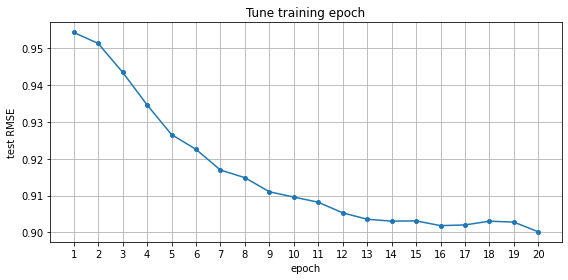

In [31]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))
ax.plot(np.arange(len(epoch_test_RMSE_list)) + 1, epoch_test_RMSE_list, marker='.', linewidth=1.5, markersize=8)
ax.set_xticks(np.arange(len(epoch_test_RMSE_list)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.show()


Based on this plot, what is the best epoch for your MF model?

*Write your answer here.*

 The best epoch obtained for my MF model is obtained to be 16

#### Tune latent dimension####

By this figure, you can find the best epoch for your MF model. Similarly, you can plot how the test RMSE changes when you set different latent dimensions. For this, you need to run the code to initialize and train the MF model for multiple times with different settings of 'latent'. Please run the MF model with 'latent' as {1,3,5,7,9}, and plot the corresponding test RMSE for these five different latent dimensions in the next cell. 

**Note that for these five runs of experiments, record the test RMSE after E training epochs -- E is the best epoch you find by the 'Tune training epoch' plot. And here, fix regularization weight as 0.001**.

**Note that the expected output of the next cell is just the plot, you don't need to show the code and printing of the experiment with different 'latent' here.**

 MF with latent dimension setting :  1
Epoch number : 1     Loss = 630811.2485245588    RMSE = 0.9637374785865724
Epoch number : 2     Loss = 612089.2118683999    RMSE = 0.9509630254446971
Epoch number : 3     Loss = 609114.403013215    RMSE = 0.9474492948813544
Epoch number : 4     Loss = 607698.6498984025    RMSE = 0.9475266928569138
Epoch number : 5     Loss = 606220.6030652081    RMSE = 0.9460293872444325
Epoch number : 6     Loss = 605481.0406847093    RMSE = 0.94549137170906
Epoch number : 7     Loss = 603858.617199212    RMSE = 0.9438671508844443
Epoch number : 8     Loss = 606715.8241865977    RMSE = 0.9461152191186439
Epoch number : 9     Loss = 603652.9348435932    RMSE = 0.9435021605983288
Epoch number : 10     Loss = 605095.6928911065    RMSE = 0.9456099574116981
Epoch number : 11     Loss = 606363.6475902589    RMSE = 0.9460186715131785
Epoch number : 12     Loss = 601836.1078479248    RMSE = 0.9421874664937069
Epoch number : 13     Loss = 604977.3663497267    RMSE = 0.944

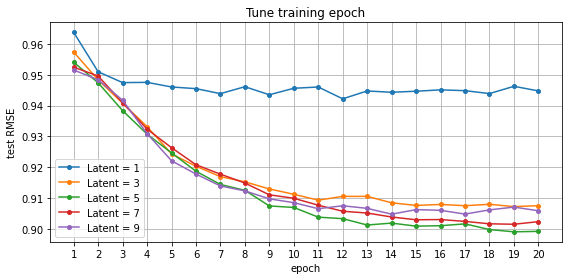

In [32]:
# Your Code Here...
latent = [1,3,5,7,9]
test_rmse = []
for lt in latent:
    print(" MF with latent dimension setting : ",lt)
    mf = MF(train_mat, test_mat, latent=lt, lr=0.01, reg=0.001)
    epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=20)
    test_rmse.append(epoch_test_RMSE_list)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

for ind, i in enumerate(test_rmse):
    ax.plot(np.arange(len(i)) + 1, i, marker='.', linewidth=1.5, markersize=8, label = "Latent = " + str(latent[ind]))
    ax.set_xticks(np.arange(len(i)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

Based on this plot, what is the best latent dimension for your MF model?

*Write your answer here.*

The best latent dimension obtained for my MF model is 5

#### Tune regularization weight####

Last, you can plot how the test RMSE changes when you set different regularization weight. Please run the MF model with 'reg' as {0.0001,0.0005,0.001,0.0015,0.002}, and plot corresponding test RMSE for these five different regularization weights in the next cell. 

**Note that for these five runs of experiments, record the test RMSE after E training epochs -- E is the best epoch you find by the 'Tune training epoch' plot. And here, fix latent dimension as the one you find the best by the previous part**

**Note that the expected output of the next cell is just the plot, you don't need to show the code and printing of the experiment with different 'reg' here.**

For the Regularization Weight :  0.0001
Epoch number : 1     Loss = 610196.030441869    RMSE = 0.9527997363378111
Epoch number : 2     Loss = 597392.9918147654    RMSE = 0.9470228527042409
Epoch number : 3     Loss = 585465.1829160071    RMSE = 0.9429689664954239
Epoch number : 4     Loss = 566685.7890949944    RMSE = 0.933727900449188
Epoch number : 5     Loss = 547754.7724548018    RMSE = 0.9253603796403456
Epoch number : 6     Loss = 537241.2835039253    RMSE = 0.9200338134673247
Epoch number : 7     Loss = 529060.3870819099    RMSE = 0.9168264625289261
Epoch number : 8     Loss = 519437.85442214855    RMSE = 0.9115223548044754
Epoch number : 9     Loss = 514011.83533106826    RMSE = 0.9101296232312108
Epoch number : 10     Loss = 509600.7119115587    RMSE = 0.9077289102523304
Epoch number : 11     Loss = 505196.61613418604    RMSE = 0.905232902450774
Epoch number : 12     Loss = 502858.8196260248    RMSE = 0.9041936950286157
Epoch number : 13     Loss = 500383.5781863017    RMSE = 

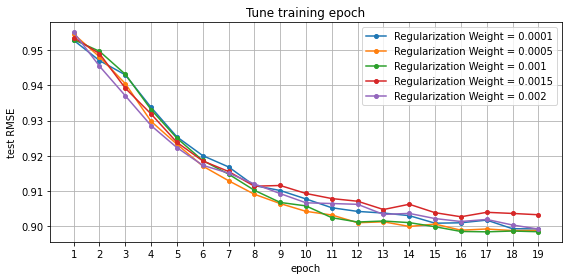

In [33]:
# Your Code Here...
reg = [0.0001,0.0005,0.001,0.0015,0.002]
test_rmse_reg = []
for r in reg:
    print("For the Regularization Weight : ",r)
    mf = MF(train_mat, test_mat, latent=5, lr=0.01, reg=r)
    epoch_loss_list, epoch_test_RMSE_list = mf.train(epoch=19)
    test_rmse_reg.append(epoch_test_RMSE_list)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

for ind, i in enumerate(test_rmse_reg):
    ax.plot(np.arange(len(i)) + 1, i, marker='.', linewidth=1.5, markersize=8, label = "Regularization Weight = " + str(reg[ind]))
    ax.set_xticks(np.arange(len(i)) + 1)
ax.set_ylabel('test RMSE')
ax.set_xlabel('epoch')
ax.set_title('Tune training epoch')
ax.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


Based on this plot, what is the best regularization weight for your MF model?


*Write your answer here*

The best regularization weight obtained for my MF model is 0.001

## Part 3e: Improve the Model (10 points)

Next, you need to try your best to improve the model so that we can improve our RMSE! This is open-ended, so feel free to try whatever tricks you like. We talked about several in class, plus you can find more in the readings. Write your code in the next cell and print out the RMSE of your new model.

In [78]:
import random
class MF1:
    def __init__(self, train_mat, test_mat, latent=5, lr=0.01, reg=0.01):
        self.train_mat = train_mat  # the training rating matrix of size (#user, #movie)
        self.test_mat = test_mat  # the training rating matrix of size (#user, #movie)
        
        self.latent = latent  # the latent dimension
        self.lr = lr  # learning rate
        self.reg = reg  # regularization weight, i.e., the lambda in the objective function
        
        self.num_user, self.num_movie = train_mat.shape
        
        self.sample_user, self.sample_movie = self.train_mat.nonzero()  # get the user-movie pairs having ratings in train_mat
        self.num_sample = len(self.sample_user)  # the number of user-movie pairs having ratings in train_mat

        self.train_indicator_mat = 1.0 * (train_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in train_mat
        self.test_indicator_mat = 1.0 * (test_mat > 0)  # binary matrix to indicate whether s user-movie pair has rating or not in test_mat

        self.P = np.random.random((self.num_user, self.latent))  # latent factors for users, size (#user, self.latent), randomly initialized
        self.Q = np.random.random((self.num_movie, self.latent))  # latent factors for items, size (#movie, self.latent), randomly initialized


    def train(self, epoch=20, verbose=True):
        epoch_loss_list = []
        epoch_test_RMSE_list = []
        for e in range(epoch):
            user_movie_pairs = list(zip(self.sample_user, self.sample_movie))
            random.shuffle(user_movie_pairs)
            for u in user_movie_pairs:
                movie = int(u[1])
                user = int(u[0])
                self.updateLatentFactor(user, movie)

            loss = 0
            for u in user_movie_pairs:
                movie = int(u[1])
                user = int(u[0])
                temp = np.dot(self.P[user], self.Q[movie].transpose()) - self.train_mat[user][movie]
                loss += np.square(temp)   

            train_loss = loss + (self.reg * (np.sum(np.square(self.Q)) + np.sum(np.square(self.P))))
            prediction_mat = self.predict()
            test_zeros = np.where(self.test_mat == 0)
            prediction_mat[test_zeros] = 0


            rmse_0 = np.subtract(prediction_mat, self.test_mat)
            rmse_1 = np.sum(np.square(rmse_0))

            test_nonzeros = np.count_nonzero(self.test_mat)
            rmse_2 = np.divide(rmse_1, test_nonzeros)

            rmse = np.sqrt(rmse_2)
            print(f"Epoch number : {e + 1}     Loss = {train_loss}    Test RMSE = {rmse}")

            epoch_loss_list.append(train_loss)
            epoch_test_RMSE_list.append(rmse)
 
        return epoch_loss_list, epoch_test_RMSE_list,prediction_mat
        
        
        
    def updateLatentFactor(self, user, movie):

      temp = 2 * (np.dot(self.P[user] , self.Q[movie].transpose()) - self.train_mat[user][movie])
      user_latentfactor = self.P[user] - self.lr * (temp * self.Q[movie] + 2 * self.reg*self.P[user])
      movie_latentfactor = self.Q[movie] - self.lr * (temp * self.P[user] + 2 * self.reg*self.Q[movie])
      self.P[user] = user_latentfactor
      self.Q[movie] = movie_latentfactor

        
    def predict(self):
        prediction_mat = np.matmul(self.P, self.Q.T)
        return prediction_mat

mf1 = MF1(train_mat, test_mat, latent=5, lr=0.01, reg=0.1)
epoch_loss_list, epoch_test_RMSE_list, pred = mf1.train(epoch=20)

Epoch number : 1     Loss = 619365.5526735404    Test RMSE = 0.9535864428012578
Epoch number : 2     Loss = 614340.596609649    Test RMSE = 0.9494283832315694
Epoch number : 3     Loss = 609188.7800433573    Test RMSE = 0.945481357593087
Epoch number : 4     Loss = 608970.0498481526    Test RMSE = 0.9460357295496736
Epoch number : 5     Loss = 604855.3013007295    Test RMSE = 0.9438072388739209
Epoch number : 6     Loss = 594271.3597337409    Test RMSE = 0.9354791382244011
Epoch number : 7     Loss = 584087.9918802782    Test RMSE = 0.9287825723000099
Epoch number : 8     Loss = 577100.5194563316    Test RMSE = 0.9241077171589761
Epoch number : 9     Loss = 571247.2130272042    Test RMSE = 0.921126639295096
Epoch number : 10     Loss = 563486.0865138021    Test RMSE = 0.9150478431987935
Epoch number : 11     Loss = 558998.8462189477    Test RMSE = 0.9143392405421975
Epoch number : 12     Loss = 556102.8355762648    Test RMSE = 0.9130560335684607
Epoch number : 13     Loss = 552543.7116

In [90]:
ensemble_prediction = 0.75 * pred + 0.25 * prediction_mat
rmse = np.sqrt(np.divide(np.sum(np.square(np.subtract(ensemble_prediction, test_mat))), np.count_nonzero(test_mat)))
print("The rmse value for ensemble model is " ,rmse)

The rmse value for ensemble model is  0.8974735065293639


And please briefly explain what your new model does to improve the performance.

*Briefly explain what you do in your new model to improve the performance Write your answer here...*

Inorder to improve my model, I have used the ensemble model where we use both the matrix factorization and collaborative filtering model(from the paper Factorization meets neighborhood by koren 2008) discussed in class. Here the factorization and the CF models are smoothly merged to build a more accurate model

Neighborhood of movies and users are used along with the latent factors when predicting the ratings of the movies. 

Here a bias term is added to the regularization term in the loss function. This bias term has both the user bias and movie bias given by their respective neighborhoods .With this ensemble technique loss function is updated.We use this loss function to compute the gradient descent and update the training loss. In order to do this, we have combined MF and CF with thier respective weighted averages which were obtained through constant observation to obtain a lower RMSE value. This is called SVD ++

The best RMSE I obtained by using this method is : 0.897. The RMSE value improved in comparison with past models.